In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

In [193]:
# Loading the dataset
X_train_orig = pd.read_json('./dataset/train_images.json', ' ').to_numpy()
Y_train_orig = pd.read_json('./dataset/train_labels.json', ' ').to_numpy()
X_test_orig = pd.read_json('./dataset/test_images.json', ' ').to_numpy()
Y_test_orig = pd.read_json('./dataset/test_labels.json', ' ').to_numpy()

[5]


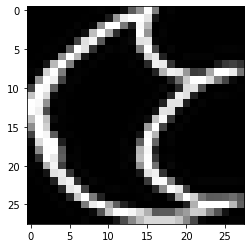

In [194]:
# Checking up some data
index = 183
temp_x_data = X_train_orig[index].reshape(28, 28)
temp_y_data = Y_train_orig[index]

plt.imshow(temp_x_data, cmap='gray')
print(temp_y_data)

In [217]:
# Setting up the label
Y_train = tf.one_hot(Y_train_orig, 10, axis=1)[:,:,0]
Y_test = tf.one_hot(Y_test_orig, 10, axis=1)[:,:,0]

# Normalizing the dataset
X_test = X_test_orig / 255
X_train = X_train_orig / 255

# Checking the shape of the dataset
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(23824, 784)
(23824, 10)
(2653, 784)
(2653, 10)


In [322]:
# Setup the model
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(784,), name='digits'))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(10))
model.compile(optimizer="Adam", loss="mse", metrics=['accuracy'])

In [323]:
# Training the model
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
745/745 [==============================] - 2s 2ms/step - loss: 0.0230 - accuracy: 0.8985 - val_loss: 0.0113 - val_accuracy: 0.9600
Epoch 2/10
745/745 [==============================] - 2s 2ms/step - loss: 0.0076 - accuracy: 0.9756 - val_loss: 0.0072 - val_accuracy: 0.9706
Epoch 3/10
745/745 [==============================] - 2s 2ms/step - loss: 0.0044 - accuracy: 0.9869 - val_loss: 0.0058 - val_accuracy: 0.9721
Epoch 4/10
745/745 [==============================] - 2s 2ms/step - loss: 0.0026 - accuracy: 0.9925 - val_loss: 0.0052 - val_accuracy: 0.9725
Epoch 5/10
745/745 [==============================] - 2s 2ms/step - loss: 0.0016 - accuracy: 0.9955 - val_loss: 0.0046 - val_accuracy: 0.9725
Epoch 6/10
745/745 [==============================] - 2s 2ms/step - loss: 0.0011 - accuracy: 0.9974 - val_loss: 0.0040 - val_accuracy: 0.9781
Epoch 7/10
745/745 [==============================] - 2s 2ms/step - loss: 0.0010 - accuracy: 0.9966 - val_loss: 0.0040 - val_accuracy: 0.9781
Epoch 

In [324]:
results = model.evaluate(X_test, Y_test)
print('test loss, test acc:', results)

83/83 [==============================] - 0s 1ms/step - loss: 0.0043 - accuracy: 0.9725
test loss, test acc: [0.004278802778571844, 0.9724839925765991]


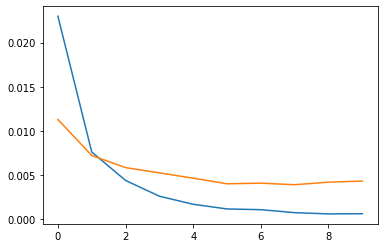

In [325]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

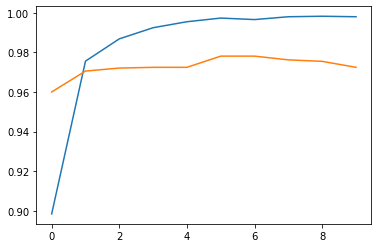

In [326]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

Predicted Answer: 4
Correct Answer: 5


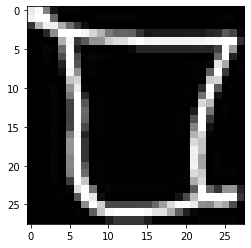

In [327]:
# Checking up some data
index = 2574
temp_x_data = X_test_orig[index].reshape(28, 28)
temp_y_data = Y_test[index]

predicted_y = model.predict(X_test)
pred = (predicted_y[index] == np.max(predicted_y[index])).astype(int)

print("Predicted Answer:", end=' ')
for i in range(pred.shape[0]):
    if pred[i]==1:
        print(i)
        
print("Correct Answer:", end=' ')
for i in range(temp_y_data.shape[0]):
    if temp_y_data[i]==1:
        print(i)
        
plt.imshow(temp_x_data, cmap='gray');

73


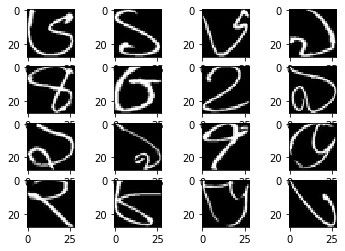

In [328]:
wrong = []
anss = []
prs = []
predicted_y = model.predict(X_test)

for i in range(Y_test.shape[0]):
    temp_y_data = Y_test[i]
    pred = (predicted_y[i] == np.max(predicted_y[i])).astype(int)
    
    ans = 0
    pr = 0
    
    for j in range(pred.shape[0]):
        if pred[j]==1:
            pr = j
    
    for j in range(temp_y_data.shape[0]):
        if temp_y_data[j]==1:
            ans = j
    
    if ans != pr:
        wrong.append(i)
        anss.append(ans)
        prs.append(pr)
        
print(len(wrong))

fig, ax = plt.subplots(4, 4)
index = 0

for i in wrong[:16]:
    ax[int(index/4)][index%4].imshow(X_test_orig[i].reshape(28, 28), cmap="gray")
    index = index + 1
    
plt.show()